<a href="https://colab.research.google.com/github/Nongbon/Stat-Learning-for-Data-Sci/blob/main/Smoothing_Techniques2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Smoothing Techniques

In [1]:
#upgrade statsmodels to 0.12.0
!pip install statsmodels==0.12.0

!wget https://raw.githubusercontent.com/Nongbon/Stat-Learning-for-Data-Sci/main/Data/austourists.csv
!wget https://raw.githubusercontent.com/Nongbon/Stat-Learning-for-Data-Sci/main/Data/exercise_hws.csv

     |████████████████████████████████| 9.5MB 2.9MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
--2021-06-14 18:54:32--  https://raw.githubusercontent.com/Nongbon/Stat-Learning-for-Data-Sci/main/Data/austourists.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1082 (1.1K) [text/plain]
Saving to: ‘austourists.csv’

austourists.csv     100%[===================>]   1.06K  --.-KB/s    in 0s      

2021-06-14 18:54:33 (42.5 MB/s) - ‘austourists.csv’ saved [1082/1082]

--2021-06-14 18:54:33--  https://raw.githubusercontent.com/Nongbon/Stat-Learning-for-Data-Sci/main/Data/exercise_hws.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing

เฉลยแบบฝึกปฏิบัติในห้อง  - Holt-winter's smoothing technique

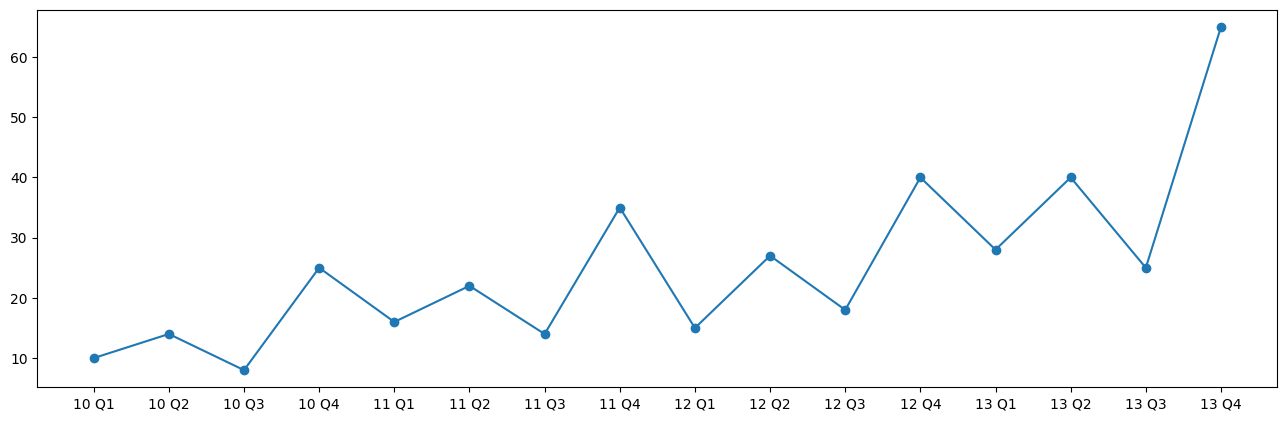

In [3]:
#load dataset
exercise_hws = pd.read_csv('exercise_hws.csv')
plt.figure(figsize=(16,5), dpi=100)
plt.plot(exercise_hws.Qtr, exercise_hws.y,  marker='o')
plt.show()

In [ ]:
#initial value in Holt-winter's Smoothing Method
import statistics as stat
seasonal_period = 4 # no. of seasonal

def initial_level(series, seasonal_period):
    initial_level = stat.mean(series[0:seasonal_period])
    return initial_level

def initial_seasonal(series, seasonal_period, init_level):
    seasonal_index = np.zeros(seasonal_period)
    for i in range(seasonal_period):
        seasonal_index[i] = series[i]/init_level
    return seasonal_index

init_level = initial_level(exercise_hws.y, seasonal_period)
# 14.25

seasonal_index = initial_seasonal(exercise_hws.y, seasonal_period, init_level)
# array([0.70175439, 0.98245614, 0.56140351, 1.75438596])

Holt-winter smoothing-Multiplicative

In [ ]:
data = exercise_hws[seasonal_period:]
fit1 = ExponentialSmoothing(data.y, 
                            seasonal_periods=seasonal_period, 
                            trend='add', 
                            seasonal='mul',
                            initial_level=init_level,
                            initial_seasonal=seasonal_index,
                            initial_trend=0,
                            initialization_method="known").fit(smoothing_level=0.5,
                                                               smoothing_seasonal=0.5,
                                                               smoothing_trend=0.5, 
                                                               optimized=False)
                            
results=pd.DataFrame(index=[r"$\alpha$",r"$\beta$",r"$\phi$",r"$\gamma$",r"$l_0$","$b_0$","SSE"])
params = ['smoothing_level', 'smoothing_trend', 'damping_trend', 'smoothing_seasonal', 'initial_level', 'initial_trend']
results["Mutiplicative"]       = [fit1.params[p] for p in params] + [fit1.sse]

df = pd.DataFrame(np.c_[data.y, fit1.level, fit1.trend, fit1.season, fit1.fittedvalues],
                  columns=[r'$y_t$',r'$l_t$',r'$b_t$',r'$s_t$',r'$\hat{y}_t$'],index=data.t)
df
fcast1 = fit1.forecast(8).rename(r'$\hat{y}_t$')
fcast1

,$y_t$,$l_t$,$b_t$,$s_t$,$\hat{y}_t$
t,,,,,
5,16.0,18.525000,2.137500,0.912281,10.000000
6,22.0,21.527679,2.570089,1.023593,20.300000
7,14.0,24.517634,2.780022,0.571185,13.528571
8,35.0,23.623828,0.943108,1.518274,47.890625
9,15.0,20.504622,-1.088049,0.761429,22.411942
10,27.0,22.897116,0.652223,1.207079,19.874677
11,18.0,27.531383,2.643245,0.667769,13.451031
12,40.0,28.260170,1.686016,1.421945,45.813343
13,28.0,33.359581,3.392713,0.848220,22.801886


Holt-winter smoothing-Additive



In [ ]:
fit2 = ExponentialSmoothing(data.y, 
                            seasonal_periods=seasonal_period, 
                            trend='add', 
                            seasonal='add',
                            initial_level=init_level,
                            initial_seasonal=seasonal_index,
                            initial_trend=0,
                            initialization_method="known").fit(smoothing_level=0.5,
                                                               smoothing_seasonal=0.5,
                                                               smoothing_trend=0.5, 
                                                               optimized=False)
                            
results=pd.DataFrame(index=[r"$\alpha$",r"$\beta$",r"$\phi$",r"$\gamma$",r"$l_0$","$b_0$","SSE"])
params = ['smoothing_level', 'smoothing_trend', 'damping_trend', 'smoothing_seasonal', 'initial_level', 'initial_trend']
results["additive"] = [fit2.params[p] for p in params] + [fit2.sse]
df = pd.DataFrame(np.c_[data.y, fit2.level, fit2.trend, fit2.season, fit2.fittedvalues],
                  columns=[r'$y_t$',r'$l_t$',r'$b_t$',r'$s_t$',r'$\hat{y}_t$'],index=data.t)
df

fcast2 = fit2.forecast(8).rename(r'$\hat{y}_t$')
fcast2

,$y_t$,$l_t$,$b_t$,$s_t$,$\hat{y}_t$
t,,,,,
5,16.0,14.774123,0.262061,1.225877,14.951754
6,22.0,18.026864,1.757401,3.973136,16.018640
7,14.0,16.611431,0.170984,-2.611431,20.345669
8,35.0,25.014015,4.286784,9.985985,18.536801
9,15.0,21.537461,0.405115,-6.537461,30.526676
10,27.0,22.484720,0.676187,4.515280,25.915712
11,18.0,21.886169,0.038818,-3.886169,20.549476
12,40.0,25.969501,2.061075,14.030499,31.910972
13,28.0,31.284018,3.687796,-3.284018,21.493115


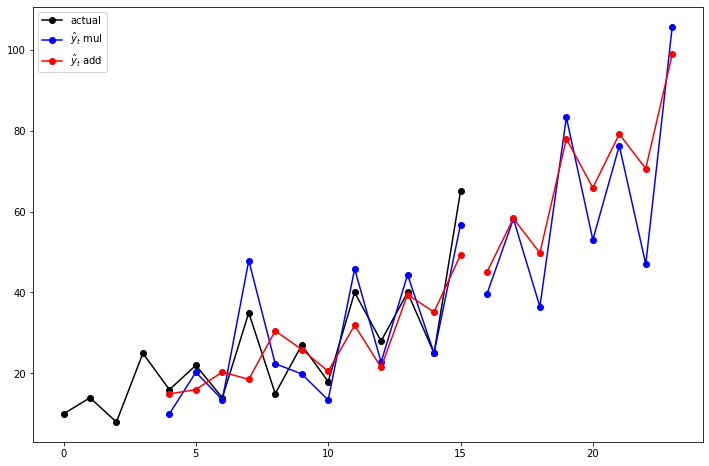

In [ ]:
plt.figure(figsize=(12, 8))
actual, = plt.plot(exercise_hws.y, marker='o', color='black')
plt.plot(fit1.fittedvalues, marker='o', color='blue')
line1, = plt.plot(fcast1, marker='o', color='blue')
plt.plot(fit2.fittedvalues, marker='o', color='red')
line2, = plt.plot(fcast2, marker='o', color='red')
plt.legend([actual, line1, line2], ["actual", fcast1.name + " mul", fcast2.name + " add"])
plt.show()

Assignment: Applying Holt-Winters’ method with additive seasonality for forecasting international visitor nights in Australia. Notice that the additive seasonal component sums to approximately zero. The smoothing parameters and initial estimates for the components have been estimated by minimising RMSE

In [ ]:
aust = pd.read_csv('austourists.csv')[:-1]
aust.head()

,Time,Year_Q,visitor
0,1.0,2005 Q1,42.205664
1,2.0,2005 Q2,24.649171
2,3.0,2005 Q3,32.667335
3,4.0,2005 Q4,37.257354
4,5.0,2006 Q1,45.242460


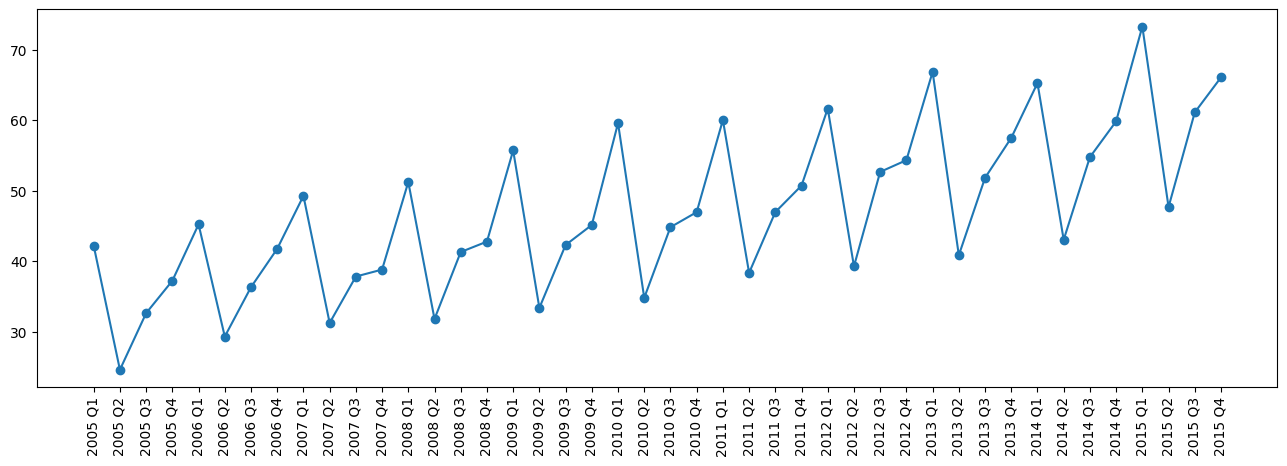

In [ ]:
plt.figure(figsize=(16,5), dpi=100)
major_xticks = np.arange(len(aust))
plt.xticks(major_xticks, rotation=90)
plt.plot(aust.Year_Q, aust.visitor,  marker='o')
plt.show()

In [ ]:
#multiplicative model
fit3 = ExponentialSmoothing(aust.visitor, 
                            seasonal_periods=4, 
                            trend='add', 
                            seasonal='mul',
                            initialization_method="estimated").fit()
                            
results1=pd.DataFrame(index=[r"$\alpha$",r"$\beta$",r"$\phi$",r"$\gamma$",r"$l_0$","$b_0$","SSE"])
params = ['smoothing_level', 'smoothing_trend', 'damping_trend', 'smoothing_seasonal', 'initial_level', 'initial_trend']
results1["Multiplicative"] = [fit3.params[p] for p in params] + [fit3.sse]
results1
df = pd.DataFrame(np.c_[aust.visitor, fit3.level, fit3.trend, fit3.season, fit3.fittedvalues],
                  columns=[r'$y_t$',r'$l_t$',r'$b_t$',r'$s_t$',r'$\hat{y}_t$'],index=aust.index)
df

fcast3 = fit3.forecast(8).rename(r'$\hat{y}_t$ mul')
fcast3

44    79.429575
45    49.655249
46    63.057303
47    67.623692
48    82.884728
49    51.791995
50    65.741880
51    70.472357
Name: $\hat{y}_t$ mul, dtype: float64

In [ ]:
#multiplicative model
fit4 = ExponentialSmoothing(aust.visitor, 
                            seasonal_periods=4, 
                            trend='add', 
                            seasonal='add',
                            initialization_method="estimated").fit()
results2 = pd.DataFrame(index=[r"$\alpha$",r"$\beta$",r"$\phi$",r"$\gamma$",r"$l_0$","$b_0$","SSE"])
params = ['smoothing_level', 'smoothing_trend', 'damping_trend', 'smoothing_seasonal', 'initial_level', 'initial_trend']
results2["Additive"] = [fit4.params[p] for p in params] + [fit4.sse]
results2
df = pd.DataFrame(np.c_[aust.visitor, fit4.level, fit4.trend, fit4.season, fit4.fittedvalues],
                  columns=[r'$y_t$',r'$l_t$',r'$b_t$',r'$s_t$',r'$\hat{y}_t$'],index=aust.index)
df

fcast4 = fit4.forecast(8).rename(r'$\hat{y}_t$ add')
fcast4

44    76.007245
45    51.449544
46    63.838528
47    67.413265
48    78.811631
49    54.253930
50    66.642914
51    70.217650
Name: $\hat{y}_t$ add, dtype: float64

In [ ]:
results2.Additive

$\alpha$    2.621970e-01
$\beta$     7.550274e-13
$\phi$               NaN
$\gamma$    4.546691e-01
$l_0$       3.280926e+01
$b_0$       7.010964e-01
SSE         1.359207e+02
Name: Additive, dtype: float64

mul SSE: 105.17469819916649
add SSE: 135.92073922731788


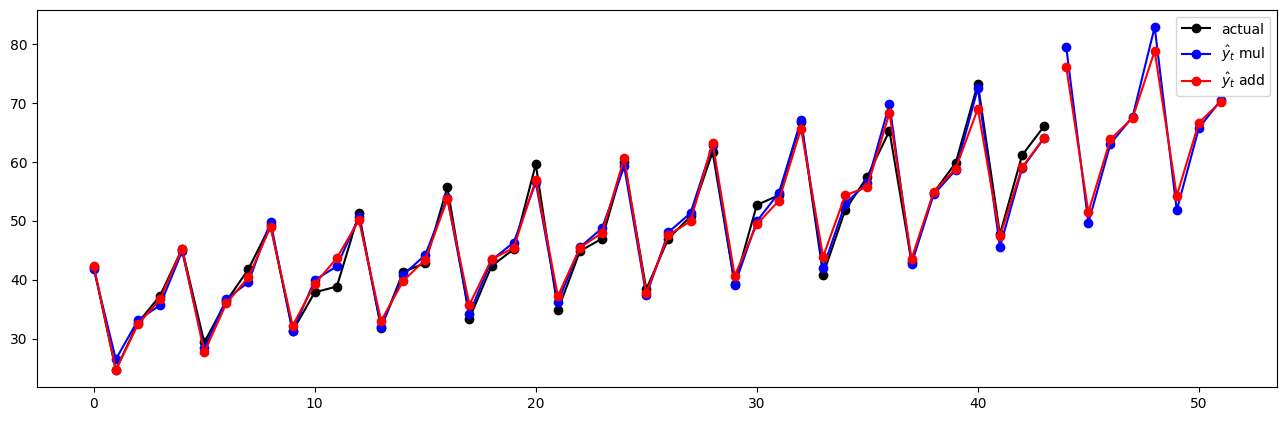

In [ ]:
plt.figure(figsize=(16,5), dpi=100)

actual, = plt.plot(aust.visitor, marker='o', color='black')
plt.plot(fit3.fittedvalues, marker='o', color='blue')
line3, = plt.plot(fcast3, marker='o', color='blue')
plt.plot(fit4.fittedvalues, marker='o', color='red')
line4, = plt.plot(fcast4, marker='o', color='red')
plt.legend([actual, line1, line2], ["actual", fcast3.name, fcast4.name])

print(f"mul SSE: {fit3.sse}")
print(f"add SSE: {fit4.sse}")
plt.show()